**Reposta oferecida por Daniel Nogueira:**

Esse tipo de conversão é super comum em dados financeiros, e realmente ficar encadeando .replace() não é a forma mais elegante ou escalável.

O módulo locale do Python permite lidar com formatos numéricos regionais, incluindo o brasileiro. Veja como usar:


In [1]:
import locale
valor = "1.000.000,50"

# Define o locale para português do Brasil
locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil.1252')

# Converte string para float usando o locale
valor_float = locale.atof(valor)

print(valor_float)
print(type(valor_float))

Error: unsupported locale setting

Mas... tem uma observação! Essa solução pode não funcionar em alguns ambientes, no Google Colab, como exemplo acima. Um erro será apresentado, afirmando que a configuração do locale não é suportada.Diferente do Jupyter Notebook, que executa o código normalmente:

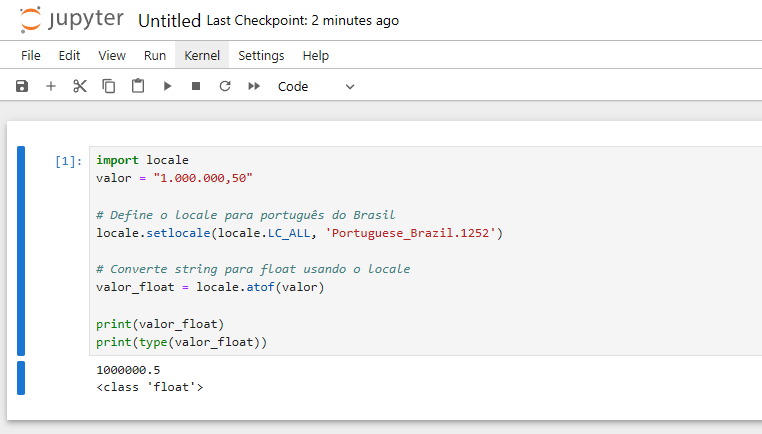

Uma solução alternativa que funciona no Google Colab é usando expressões regulares. Assim:

In [2]:
import re # re = regular expression
valor = "1.000.000,50"

def br_to_float(valor_str):
    # Remove todos os pontos que são separadores de milhar
    valor_str = re.sub(r'\.(?=\d{3}(?:\.|,|$))', '', valor_str)

    # Substitui vírgula decimal por ponto
    valor_str = valor_str.replace(',', '.')

    return float(valor_str)

print(br_to_float(valor))
print(type(br_to_float(valor)))

1000000.5
<class 'float'>


## Funções Comuns no Módulo `re`:

*   **`re.search(pattern, string)`**: Percorre uma string, procurando a primeira localização onde o padrão produz uma correspondência. Retorna um objeto match se uma correspondência for encontrada, caso contrário, None.
*   **`re.match(pattern, string)`**: Verifica uma correspondência apenas no início da string. Retorna um objeto match se uma correspondência for encontrada no início, caso contrário, None.
*   **`re.findall(pattern, string)`**: Retorna uma lista de todas as correspondências não sobrepostas do padrão na string.
*   **`re.sub(pattern, repl, string)`**: Substitui todas as ocorrências do padrão na string com `repl`.
*   **`re.split(pattern, string)`**: Divide a string pelas ocorrências do padrão.